# The Oscillator

In [70]:
#Generic headers
%matplotlib notebook
from PyDSTool import *
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [71]:
#System definition
OsciDS=args(name='singleOscillator',
           varspecs={'theta':'omega'},
           pars={'omega':0.1*np.pi},
           ics={'theta':np.pi/2})
OsciDS.tdata=[0,20]
Osci=Generator.Vode_ODEsystem(OsciDS)

<IPython.core.display.Javascript object>


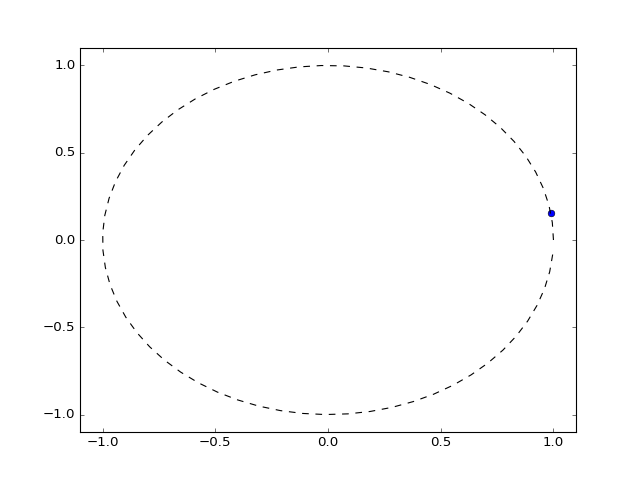

41


In [72]:
traj=Osci.compute('test')
pts=traj.sample(dt=0.5)
f,ax=plt.subplots()
line,=ax.plot([],[],'bo')
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
T=np.arange(0,2*np.pi,0.1)
plt.plot(np.cos(T),np.sin(T),linestyle='dashed',color='k')
maxlen=len(list(pts['theta']))
print maxlen
def animate(i):
    line.set_data(np.cos(pts['theta'][i]),np.sin(pts['theta'][i]))
    return line,
ani1=animation.FuncAnimation(f,animate,frames=np.arange(0,maxlen),interval=20)
plt.show()
#ani1.save('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Animations/Single_Oscillator/Single_Oscillator.png',writer='imagemagick')

# 2 Uncoupled Oscillators

<IPython.core.display.Javascript object>


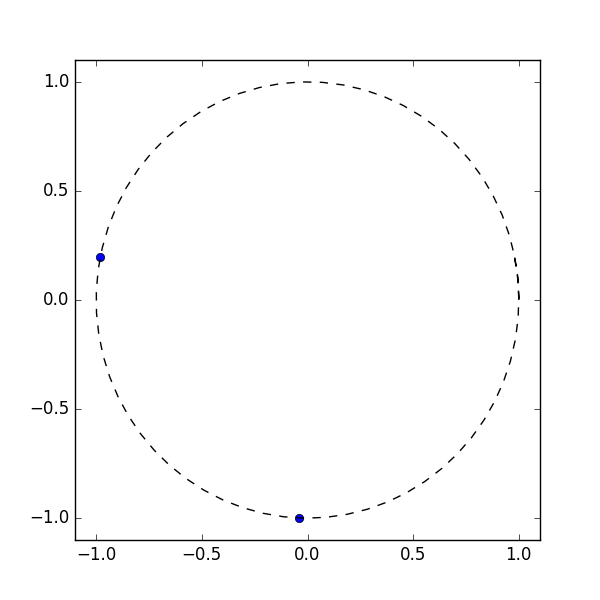

In [74]:
from PyDSTool import *
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import numpy.random as random

kuramotoDS=args()
##################################################################
###### Specify number of oscillators and strength of coupling here
##################################################################

num_oscillators=2
coupling_strength=0

kuramotoDS.pars={'omega':0.1,'K':coupling_strength}

kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',0.1+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i])))', 'x'+str(num_oscillators-1):'0.2+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+'))'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=1)
f,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
line,=ax.plot([],[],'o')

Ox=[[]]
Oy=[[]]
time=list(pts['t'])
for i in range(0,len(time)):
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        x_summ.append(np.cos(pts[name][i]))
        y_summ.append(np.sin(pts[name][i]))
    Oy.append(y_summ)
    Ox.append(x_summ)  
def animate(i):
    line.set_xdata(Ox[i][:])
    line.set_ydata(Oy[i][:])
    return line,
#def init(i):
#    line.set_data([],[])
#    return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(0,len(time)),interval=30)#,blit=True)
theta=np.arange(0,2.1*(np.pi),0.1)
plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()


# Kuramoto Models

<IPython.core.display.Javascript object>


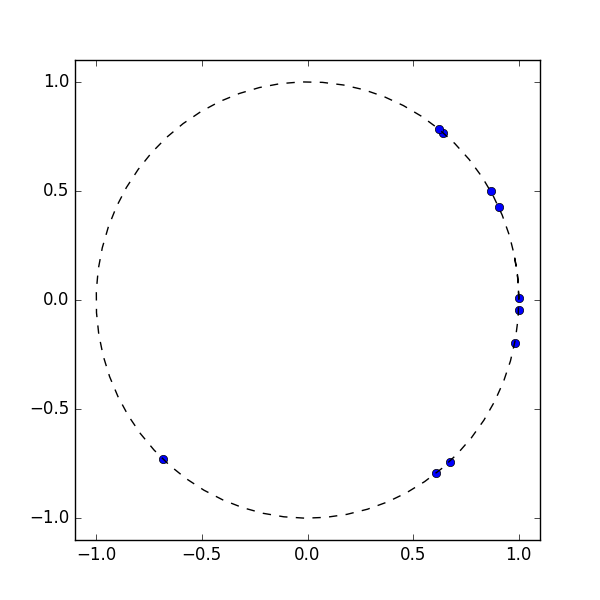

In [78]:
from PyDSTool import *
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import numpy.random as random

kuramotoDS=args()
##################################################################
###### Specify number of oscillators and strength of coupling here
##################################################################

num_oscillators=10
coupling_strength=0.01


kuramotoDS.pars={'omega':0.1,'K':coupling_strength}

kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',omega+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i])))', 'x'+str(num_oscillators-1):'omega+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+'))'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=1)
f,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
line,=ax.plot([],[],'o')

Ox=[[]]
Oy=[[]]
time=list(pts['t'])
for i in range(0,len(time)):
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        x_summ.append(np.cos(pts[name][i]))
        y_summ.append(np.sin(pts[name][i]))
    Oy.append(y_summ)
    Ox.append(x_summ)  
def animate(i):
    line.set_xdata(Ox[i][:])
    line.set_ydata(Oy[i][:])
    return line,
#def init(i):
#    line.set_data([],[])
#    return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(0,len(time)),interval=30)#,blit=True)
theta=np.arange(0,2.1*(np.pi),0.1)
plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()



# The Order Parameter

<IPython.core.display.Javascript object>


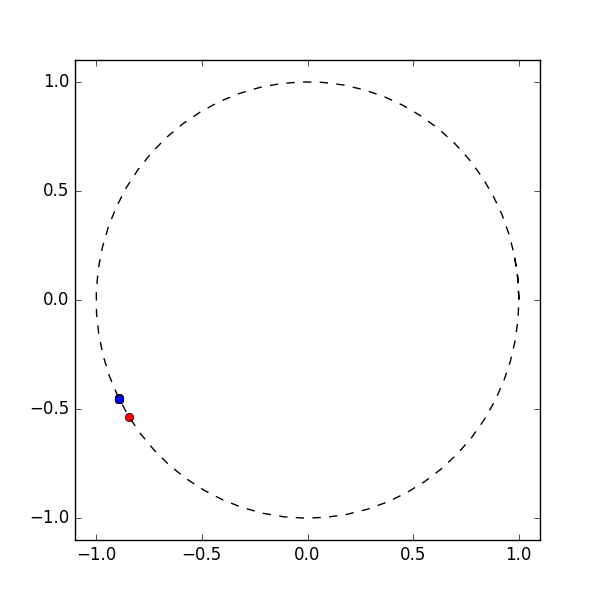

In [131]:
from PyDSTool import *
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import numpy.random as random
import cmath as cmath

kuramotoDS=args()
##################################################################
###### Specify number of oscillators and strength of coupling here
##################################################################

num_oscillators=15
coupling_strength=0.01


kuramotoDS.pars={'omega':0.1,'K':coupling_strength}

kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',omega+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i])))', 'x'+str(num_oscillators-1):'omega+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+'))'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=1)
f,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
# line,=ax.plot([],[],'o')

lines=[]
lobj1 = ax.plot([],[],'bo')[0]
lobj2 = ax.plot([],[],'ro')[0]
lines.append(lobj1)
lines.append(lobj2)
Ox=[[]]
Oy=[[]]
Theta=[]

time=list(pts['t'])
for i in range(0,len(time)):
    cum_sintheta=[]
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        cum_sintheta.append(np.exp(1.0j*pts[name][i]))
    Theta.append(sum(cum_sintheta)/num_oscillators)
    for name in varnamedict:
        x_summ.append(np.cos(pts[name][i]))
        y_summ.append(np.sin(pts[name][i]))
    Oy.append(y_summ)
    Ox.append(x_summ)  

    
    

def animate(i):
    R,P=cmath.polar(Theta[i])
    lines[1].set_xdata(R*np.cos(P))
    lines[1].set_ydata(R*np.sin(P))
    lines[0].set_xdata(Ox[i][:])
    lines[0].set_ydata(Oy[i][:])
    return lines,
def init(i):
    lines[0].set_data([],[])
    lines[1].set_data([],[])
    return lines,
# def init(i):
#     line.set_data([],[])
#     return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(0,len(time)),interval=100)#,blit=True)
theta=np.arange(0,2.1*(np.pi),0.1)
plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()


In [127]:
len(time)

159

# Forced Kuramoto oscillator

In [83]:
from PyDSTool import *
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import numpy.random as random

kuramotoDS=args()
##################################################################
###### Specify number of oscillators and strength of coupling here
##################################################################

num_oscillators=25
coupling_strength=0.1

kuramotoDS.pars={}
kuramotoDS.pars={'K':coupling_strength,'F':0.5}

for i in range(0,num_oscillators):
    parname=str('omega'+str(i))
    #varnamedict.append(varname)
    kuramotoDS.pars[parname]=(2*np.pi)*random.standard_cauchy(1)


kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',omega'+str(i)+'+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i]))+F*sin(0.1-x[i]))', 'x'+str(num_oscillators-1):'omega'+str(num_oscillators-1)+'+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+')) + F*sin(0.1 -x'+str(num_oscillators-1)+')'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=0.05)
f,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
line,=ax.plot([],[],'o')

Ox=[[]]
Oy=[[]]
time=list(pts['t'])
for i in range(0,len(time)):
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        x_summ.append(np.cos(pts[name][i]))
        y_summ.append(np.sin(pts[name][i]))
    Oy.append(y_summ)
    Ox.append(x_summ)  
def animate(i):
    line.set_xdata(Ox[i][:])
    line.set_ydata(Oy[i][:])
    return line,
#def init(i):
#    line.set_data([],[])
#    return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(0,len(time)),interval=100)#,blit=True)
theta=np.arange(0,2.1*(np.pi),0.1)
plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()


In [63]:
kuramotoDS.pars

{'F': 0,
 'K': 0.0,
 'omega0': array([-12.32938528]),
 'omega1': array([-15.61862383]),
 'omega2': array([ 0.68145392]),
 'omega3': array([ 3.59697494]),
 'omega4': array([ 2.04615456]),
 'omega5': array([ 16.12459238]),
 'omega6': array([ 2.91612133]),
 'omega7': array([ 14.48981061]),
 'omega8': array([-5.67154247]),
 'omega9': array([ 14.33699123])}

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

In [34]:
x=np.arange(-10,10,0.1)
Y1=1/(np.pi*(1+x**2))
Y2=(1/(np.sqrt(2*np.pi)))*np.exp(-x**2/4)

In [38]:
plt.plot(x,Y1/max(Y1),'g.',label='Lorentz')
plt.plot(x,Y2/max(Y2),'r.',label='Gaussian')
plt.legend()
plt.xlabel('$z$')
plt.ylabel('Scaled $p(z)$')
plt.show()

# The Logistic Growth Model

In [1]:
%matplotlib inline
from PyDSTool import *
import matplotlib.pyplot as plt
import numpy as np


In [2]:
LogisticArgs=args(name='PV_model',
                 varspecs={'N':'r*N*(1-N/K)'},
                 pars={'r':0.1,'K':10},
                 ics={'N':0},
                 tdata=[0,10])
LogisticDS=Generator.Vode_ODEsystem(LogisticArgs)

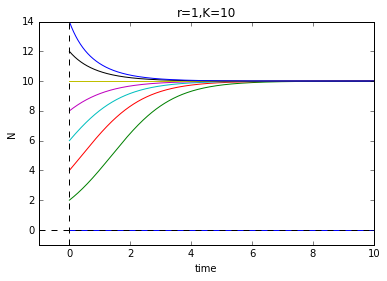

In [11]:
Carry_Cap=10.0
ICDICT=np.arange(0,1.5*Carry_Cap,2)
LogisticDS.set(pars={'r':1})
for ic in ICDICT:
    LogisticDS.set(ics={'N':ic})
    traj=LogisticDS.compute('new_ic')
    pts=traj.sample()
    plt.plot(pts['t'],pts['N'],label=str(ic))
plt.xlabel('time')
plt.ylabel('N')
plt.title('r=1,K=10')
plt.axhline(0,color='k',linestyle='dashed')
plt.axvline(0,color='k',linestyle='dashed')
plt.ylim([-1,max(ICDICT)])
plt.xlim([-1,10])
# plt.show()
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_growth_varying_ics.pdf')

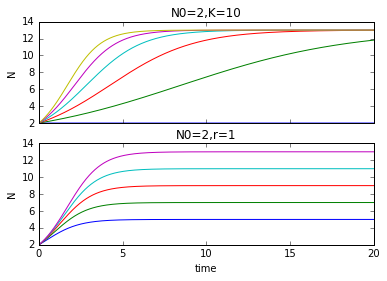

In [38]:
ax1=plt.subplot(211)

r_dict=np.arange(0,1.2,0.2)
LogisticDS.set(ics={'N':2})
for R in r_dict:
    LogisticDS.set(pars={'r':R})
    traj=LogisticDS.compute('new_rate')
    pts=traj.sample()
    ax1.plot(pts['t'],pts['N'],label=str(R))
# ax1.set_xlabel('time')
ax1.set_ylabel('N')
ax1.set_title('N0=2,K=10')

ax2=plt.subplot(212,sharex=ax1)
K_list=np.arange(5,15,2)
LogisticDS.set(ics={'N':2},pars={'r':1})
for K in K_list:
    LogisticDS.set(pars={'K':K})
    traj=LogisticDS.compute('new_K')
    pts=traj.sample()
    ax2.plot(pts['t'],pts['N'],label=str(K))
ax2.set_xlabel('time')
ax2.set_ylabel('N')
ax2.set_title('N0=2,r=1')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_growth_varying_params.pdf')
#plt.show()

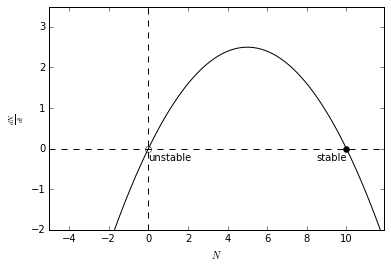

In [40]:
N=np.arange(-5,12,0.1)
K=10
r=1
dN=r*N*(1-N/K)
plt.plot(N,dN,'k')

plt.plot(10,0,'ko')
plt.plot(0,0,'ko',markerfacecolor='none')
plt.axhline(0,color='k',linestyle='dashed')
plt.axvline(0,color='k',linestyle='dashed')
plt.xlim([-5,max(N)])
plt.ylim([-2,max(dN)+1])
plt.xlabel('$N$')
plt.ylabel('$\\frac{dN}{dt}$')
plt.annotate('unstable',xy=(0,-0.3))
plt.annotate('stable',xy=(8.5,-0.3))
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_growth_qualitative_dynamics.pdf')

# plt.setp(ax2.get_xticklabels(), visible=False)

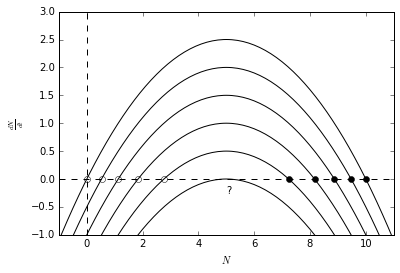

In [52]:
K=10
r=1
predation=np.arange(0,3,0.5)
#plt.figure(figsize=(10,8))

for p in predation:
    N=np.arange(-2,12,0.1)
    dN=(r)*N*(1-N/K)-p
    plt.plot(N,dN,'k',label=str(p))
    if p<2.5:
        plt.plot((K-np.sqrt(K**2-4*(p*K/r)))/2,0,'ko',markerfacecolor='none')
        plt.plot((K+np.sqrt(K**2-4*(p*K/r)))/2,0,'ko')

# p=2.5
# N=np.arange(-2,12,0.1)
# dN=(r)*N*(1-N/K)-p
# plt.plot(N,dN)

#    plt.plot(K,0,'ko',markerfacecolor='none')
#plt.plot(0,0,'ko')
plt.axhline(0,color='k',linestyle='dashed')
plt.axvline(0,color='k',linestyle='dashed')
plt.xlim([-1,K+1])
plt.ylim([-1,3])
plt.annotate('?',xy=(5,-0.25))
plt.xlabel('$N$')
plt.ylabel('$\\frac{dN}{dt}$')
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_predation_qualitative.pdf')

plt.show()

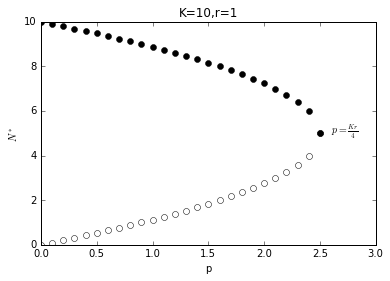

In [65]:
K=10
r=1
predation=np.arange(0,2.6,0.1)
#plt.figure(figsize=(10,8))

for p in predation:
    N=np.arange(-2,12,0.1)
    dN=(r)*N*(1-N/K)-p
#     plt.plot(N,dN,'k',label=str(p))
    plt.plot(p,(K-np.sqrt(K**2-4*(p*K/r)))/2,'ko',markerfacecolor='none')
    plt.plot(p,(K+np.sqrt(K**2-4*(p*K/r)))/2,'ko')
plt.xlim([0,3])
plt.xlabel('p')
plt.ylabel('$N^*$')
plt.annotate('$p=\\frac{Kr}{4}$',xy=(2.6,5))
plt.title('K=10,r=1')
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_predation_parametric.pdf')


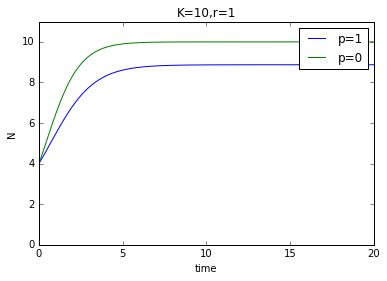

In [63]:
LogisticPredArgs=args(name='logpred',
                     varspecs={'N':'r*N*(1-N/K)-p'},
                     pars={'p':1,'K':10,'r':1},
                     ics={'N':4},
                     tdata=[0,20])
LogPredDS=Generator.Vode_ODEsystem(LogisticPredArgs)
traj=LogPredDS.compute('test')
pts=traj.sample()
LogisticDS.set(pars={'K':10,'r':1},
                     ics={'N':4},
                     tdata=[0,20])
traj1=LogisticDS.compute('anothertest')
pts1=traj1.sample()
#plt.figure(figsize=(10,8))

plt.plot(pts['t'],pts['N'],label='p=1')
plt.plot(pts1['t'],pts1['N'],label='p=0')
plt.xlabel('time')
plt.ylabel('N')
plt.ylim([0,11])
plt.legend()
plt.savefig('/home/amogh/Documents/VTech/sem3GBCB/ComputingTheBrain/Class_presentation/Logistic_growth_dynamics_predation.pdf')

# plt.plot(pts['t'],pts['N'])


# plt.show()